In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import itertools
from scipy import stats

# JSON API
import requests
import json

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import tsa_acquire_all
from acquire import peekatdata
from acquire import missing_values_col
from prepare import data_prepped
from prepare import missing_values_col

In [5]:
#df = tsa_acquire_all()

In [2]:
df = data_prepped(tsa_acquire_all())

Checking for existing items.csv...
Reading items from local csv...

Checking for existing stores.csv...
Reading stores from local csv...

Checking for existing sales.csv...
Reading sales from local csv...

Writing final df.csv...

Finished writing final df.csv.  Final df done.

HEADS UP: finished all tsa acquire.  Full Stop!

Final raw df now ready to begin data preparations.



Please wait for df preparations to process...

Date/time conversion in process...
Additional data parts are being added...
Executing "improve_sales_data" function...
Renaming "sale_amount" field to "quantity"...
New index is being set with the date/time field...

New prepped df is ready for use.



In [3]:
df.tail(3)

,item_id,quantity,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,...,store_city,store_state,store_zipcode,year,quarter,month,day,weekday,is_weekend,sale_total
sale_date_index_col,,,,,,,,,,,,,,,,,,,,,
2017-12-29,50,74.0,2017-12-29,912998,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221,...,San Antonio,TX,78231,2017,4,12,29,Fri,False,384.8
2017-12-30,50,62.0,2017-12-30,912999,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221,...,San Antonio,TX,78231,2017,4,12,30,Sat,True,322.4
2017-12-31,50,82.0,2017-12-31,913000,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221,...,San Antonio,TX,78231,2017,4,12,31,Sun,True,426.4


In [4]:
missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
item_id,0,0.0,0,0.0,0,0.0
quantity,0,0.0,0,0.0,0,0.0
sale_date,0,0.0,0,0.0,0,0.0
sale_id,0,0.0,0,0.0,0,0.0
store_id,0,0.0,0,0.0,0,0.0
item_brand,0,0.0,0,0.0,0,0.0
item_name,0,0.0,0,0.0,0,0.0
item_price,0,0.0,0,0.0,0,0.0
item_upc12,0,0.0,0,0.0,0,0.0
item_upc14,0,0.0,0,0.0,0,0.0


In [5]:
peekatdata(df)


 
 SHAPE:
(913000, 21)

 
 COLS:
Index(['item_id', 'quantity', 'sale_date', 'sale_id', 'store_id', 'item_brand',
       'item_name', 'item_price', 'item_upc12', 'item_upc14', 'store_address',
       'store_city', 'store_state', 'store_zipcode', 'year', 'quarter',
       'month', 'day', 'weekday', 'is_weekend', 'sale_total'],
      dtype='object')

 
 INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 21 columns):
item_id          913000 non-null int64
quantity         913000 non-null float64
sale_date        913000 non-null datetime64[ns]
sale_id          913000 non-null int64
store_id         913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-

In [6]:
df.head(3)

,item_id,quantity,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,...,store_city,store_state,store_zipcode,year,quarter,month,day,weekday,is_weekend,sale_total
sale_date_index_col,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,2013-01-01,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,1,Tue,False,10.92
2013-01-02,1,11.0,2013-01-02,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,2,Wed,False,9.24
2013-01-03,1,14.0,2013-01-03,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,3,Thu,False,11.76


In [7]:
by_date = df.groupby(['sale_date'])['quantity'].sum()

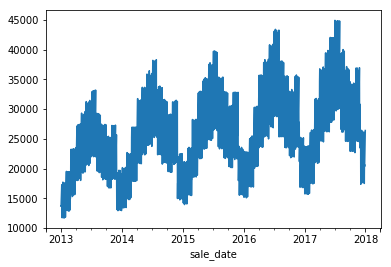

In [8]:
by_date.plot(x='sale_date', y='quantity')

In [9]:
df.sale_date.nunique()

1826

In [10]:
df.sale_date.min()

Timestamp('2013-01-01 00:00:00')

In [11]:
df.sale_date.max()

Timestamp('2017-12-31 00:00:00')

In [12]:
timedelta(df.sale_date.nunique()) == df.sale_date.max() - df.sale_date.min() + timedelta(days=1)

True

In [13]:
df.store_id.nunique()

10

In [14]:
print(df.store_id.value_counts().unique())

[91300]


In [15]:
df.item_id.nunique()

50

In [16]:
print(df.item_id.value_counts(sort=False).unique())

[18260]


In [17]:
print(df.groupby(['store_id','item_id']).sale_date.min().unique())
print(df.groupby(['store_id','item_id']).sale_date.max().unique())
print(df.groupby(['store_id','item_id']).sale_date.nunique().unique())

['2013-01-01T00:00:00.000000000']
['2017-12-31T00:00:00.000000000']
[1826]


In [18]:
df.isnull().sum()

item_id          0
quantity         0
sale_date        0
sale_id          0
store_id         0
item_brand       0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
store_address    0
store_city       0
store_state      0
store_zipcode    0
year             0
quarter          0
month            0
day              0
weekday          0
is_weekend       0
sale_total       0
dtype: int64

In [19]:
df = df.sort_values('sale_date')

In [20]:
df.head(3)

,item_id,quantity,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,...,store_city,store_state,store_zipcode,year,quarter,month,day,weekday,is_weekend,sale_total
sale_date_index_col,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,2013-01-01,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,1,Tue,False,10.92
2013-01-01,17,26.0,2013-01-01,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,...,San Antonio,TX,78201,2013,1,1,1,Tue,False,30.16
2013-01-01,7,32.0,2013-01-01,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,...,San Antonio,TX,78231,2013,1,1,1,Tue,False,308.48


In [21]:
df.loc['2013-01-01'].head()

,item_id,quantity,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,...,store_city,store_state,store_zipcode,year,quarter,month,day,weekday,is_weekend,sale_total
sale_date_index_col,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,2013-01-01,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,1,Tue,False,10.92
2013-01-01,17,26.0,2013-01-01,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,...,San Antonio,TX,78201,2013,1,1,1,Tue,False,30.16
2013-01-01,7,32.0,2013-01-01,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,...,San Antonio,TX,78231,2013,1,1,1,Tue,False,308.48
2013-01-01,18,45.0,2013-01-01,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,...,San Antonio,TX,78201,2013,1,1,1,Tue,False,197.55
2013-01-01,19,34.0,2013-01-01,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,...,San Antonio,TX,78201,2013,1,1,1,Tue,False,25.16


In [22]:
print(df['2013-12-29':'2014-01-01'].head())

                     item_id  quantity  sale_date  sale_id  store_id  \
sale_date_index_col                                                    
2013-12-29                 5      10.0 2013-12-29    77055         3   
2013-12-29                49      10.0 2013-12-29   887799         7   
2013-12-29                23      19.0 2013-12-29   418517        10   
2013-12-29                40      23.0 2013-12-29   712503         1   
2013-12-29                28      50.0 2013-12-29   502513         6   

                         item_brand  \
sale_date_index_col                   
2013-12-29           Back To Nature   
2013-12-29                 Easy-off   
2013-12-29                    Reese   
2013-12-29                     Amys   
2013-12-29             Usda Produce   

                                                             item_name  \
sale_date_index_col                                                      
2013-12-29           Back To Nature Gluten Free White Cheddar Rice ...   

In [23]:
df.groupby(['sale_date']).quantity.sum().head()

sale_date
2013-01-01    13696.0
2013-01-02    13678.0
2013-01-03    14488.0
2013-01-04    15677.0
2013-01-05    16237.0
Name: quantity, dtype: float64

In [24]:
df2 = df.groupby(['sale_date']).quantity.sum().asfreq('12H')

In [25]:
df2.head()

sale_date
2013-01-01 00:00:00    13696.0
2013-01-01 12:00:00        NaN
2013-01-02 00:00:00    13678.0
2013-01-02 12:00:00        NaN
2013-01-03 00:00:00    14488.0
Freq: 12H, Name: quantity, dtype: float64

In [26]:
df2.asfreq('12H').ffill().head()

sale_date
2013-01-01 00:00:00    13696.0
2013-01-01 12:00:00    13696.0
2013-01-02 00:00:00    13678.0
2013-01-02 12:00:00    13678.0
2013-01-03 00:00:00    14488.0
Freq: 12H, Name: quantity, dtype: float64

In [28]:
df.resample('2D').aggregate(np.max).head()

,item_id,quantity,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,...,store_city,store_state,store_zipcode,year,quarter,month,day,weekday,is_weekend,sale_total
sale_date_index_col,,,,,,,,,,,,,,,,,,,,,
2013-01-01,50,71.0,2013-01-02,911176,10,Zhenas Gypsy Tea,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...,9.64,884623708976,884623708976,...,San Antonio,TX,78253,2013,1,1,2,Wed,False,646.81
2013-01-03,50,74.0,2013-01-04,911178,10,Zhenas Gypsy Tea,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...,9.64,884623708976,884623708976,...,San Antonio,TX,78253,2013,1,1,4,Thu,False,619.48
2013-01-05,50,97.0,2013-01-06,911180,10,Zhenas Gypsy Tea,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...,9.64,884623708976,884623708976,...,San Antonio,TX,78253,2013,1,1,6,Sun,True,756.13
2013-01-07,50,74.0,2013-01-08,911182,10,Zhenas Gypsy Tea,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...,9.64,884623708976,884623708976,...,San Antonio,TX,78253,2013,1,1,8,Tue,False,674.14
2013-01-09,50,78.0,2013-01-10,911184,10,Zhenas Gypsy Tea,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...,9.64,884623708976,884623708976,...,San Antonio,TX,78253,2013,1,1,10,Wed,False,601.26


In [29]:
df.resample('2D').aggregate(np.sum).head()

,item_id,quantity,sale_id,store_id,item_price,item_upc12,item_upc14,store_zipcode,year,quarter,month,day,is_weekend,sale_total
sale_date_index_col,,,,,,,,,,,,,,
2013-01-01,25500,27374.0,455588500,5500,5160.4,238468784491040,238468784491040,78224800,2013000,1000,1000,1500,0.0,147414.59
2013-01-03,25500,30165.0,455590500,5500,5160.4,238468784491040,238468784491040,78224800,2013000,1000,1000,3500,0.0,162637.21
2013-01-05,25500,33528.0,455592500,5500,5160.4,238468784491040,238468784491040,78224800,2013000,1000,1000,5500,1000.0,180715.70
2013-01-07,25500,25329.0,455594500,5500,5160.4,238468784491040,238468784491040,78224800,2013000,1000,1000,7500,0.0,136772.20
2013-01-09,25500,28520.0,455596500,5500,5160.4,238468784491040,238468784491040,78224800,2013000,1000,1000,9500,0.0,154125.11


In [30]:
df.resample('2D').aggregate(np.mean).head()

,item_id,quantity,sale_id,store_id,item_price,item_upc12,item_upc14,store_zipcode,year,quarter,month,day,is_weekend,sale_total
sale_date_index_col,,,,,,,,,,,,,,
2013-01-01,25.5,27.374,455588.5,5.5,5.1604,2.384688e+11,2.384688e+11,78224.8,2013.0,1.0,1.0,1.5,0.0,147.41459
2013-01-03,25.5,30.165,455590.5,5.5,5.1604,2.384688e+11,2.384688e+11,78224.8,2013.0,1.0,1.0,3.5,0.0,162.63721
2013-01-05,25.5,33.528,455592.5,5.5,5.1604,2.384688e+11,2.384688e+11,78224.8,2013.0,1.0,1.0,5.5,1.0,180.71570
2013-01-07,25.5,25.329,455594.5,5.5,5.1604,2.384688e+11,2.384688e+11,78224.8,2013.0,1.0,1.0,7.5,0.0,136.77220
2013-01-09,25.5,28.520,455596.5,5.5,5.1604,2.384688e+11,2.384688e+11,78224.8,2013.0,1.0,1.0,9.5,0.0,154.12511
